 ### Dimensionality Reduction and Clustering:


#### With under sampling

In [50]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [51]:
df = pd.read_csv('under_sampled.csv')


In [52]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [53]:
X_tsne = TSNE(n_components=2).fit_transform(X.values)
X_PCA = PCA(n_components=2).fit_transform(X.values)
X_SVD= TruncatedSVD(n_components=2, algorithm='randomized').fit_transform(X.values)


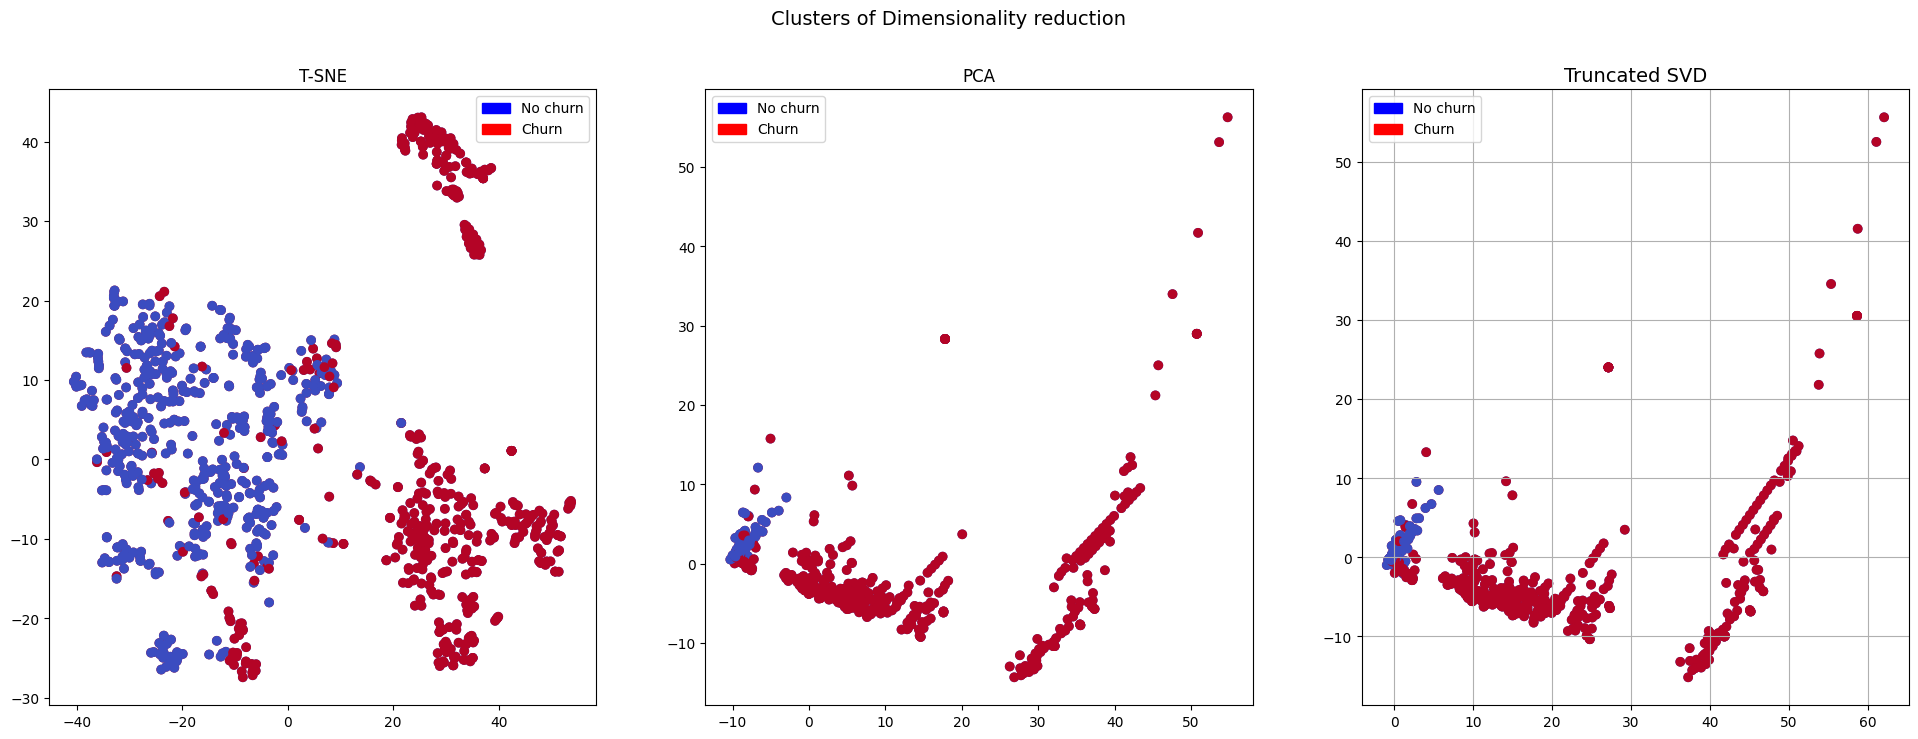

In [54]:
## Ploting reductions 

f, (ax1, ax2, ax3)= plt.subplots(1,3,figsize =(24,8))
f.suptitle('Clusters of Dimensionality reduction', fontsize = 14)

blue_patch = mpatches.Patch(color='blue', label = 'No churn')
red_patch = mpatches.Patch(color='red', label = 'Churn')

ax1.scatter(X_tsne[:,0], X_tsne[:,1], c = (y == 0), cmap='coolwarm', label='No churn')
ax1.scatter(X_tsne[:,0], X_tsne[:,1], c = (y == 1), cmap='coolwarm', label='Churn')
ax1.legend(handles=[blue_patch, red_patch])
ax1.set_title('T-SNE')


ax2.scatter(X_PCA[:,0], X_PCA[:,1], c=(y == 0), cmap='coolwarm', label='No churn')
ax2.scatter(X_PCA[:,0], X_PCA[:,1], c=(y == 1), cmap='coolwarm', label='Churn')
ax2.legend(handles=[blue_patch, red_patch])
ax2.set_title('PCA')


ax3.scatter(X_SVD[:,0], X_SVD[:,1], c=(y == 0), cmap='coolwarm', label='No churn')
ax3.scatter(X_SVD[:,0], X_SVD[:,1], c=(y == 1), cmap='coolwarm', label='Churn')
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])


In [55]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter=1000),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Bagging": BaggingClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

In [57]:
#just testing generally which model works best with default params
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_score = cross_val_score(classifier, X_train, y_train, cv=10)
    print("Classifier: ", classifier.__class__.__name__, "Has a training score of", round(train_score.mean(), 2) * 100, "% accuracy score")

Classifier:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifier:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifier:  SVC Has a training score of 93.0 % accuracy score
Classifier:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score
Classifier:  BaggingClassifier Has a training score of 93.0 % accuracy score
Classifier:  RandomForestClassifier Has a training score of 94.0 % accuracy score
Classifier:  AdaBoostClassifier Has a training score of 94.0 % accuracy score
Classifier:  GradientBoostingClassifier Has a training score of 94.0 % accuracy score


In [58]:
from sklearn.model_selection import GridSearchCV
# we identify params to modify for gridsearchcv

for k,c in classifiers.items():
    print(f'\n Classifier : {k} has parameters : {c.get_params()}\n')


 Classifier : LogisiticRegression has parameters : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


 Classifier : KNearest has parameters : {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


 Classifier : Support Vector Classifier has parameters : {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


 Classifier : DecisionTreeClassifier has parameters : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max

In [59]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.1, 1, 10, 100], "solver": ['liblinear', 'saga']}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=10000), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_


In [60]:
grid_log_reg.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

In [61]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

In [62]:
grid_knears.best_params_

{'algorithm': 'auto', 'n_neighbors': 2}

In [63]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(probability=True), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

In [64]:
grid_svc.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [65]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [66]:
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6}

In [67]:
bag_params = {"n_estimators": [10, 50, 100], "max_samples": [0.5, 1.0], "max_features": [0.5, 1.0]}
grid_bag = GridSearchCV(BaggingClassifier(), bag_params)
grid_bag.fit(X_train, y_train)
bag_clf = grid_bag.best_estimator_

In [68]:
grid_bag.best_params_

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}

In [69]:

rf_params = {"n_estimators": [50, 100, 200], "max_depth": [10, 20, 50], "min_samples_split": [2, 5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)
rf_clf = grid_rf.best_estimator_

In [70]:
grid_rf.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

In [71]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1]
}



In [72]:
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid)
grid_ada.fit(X_train, y_train)
ada_clf = grid_ada.best_estimator_
print("Best parameters for AdaBoost:", grid_ada.best_params_)



Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}


In [73]:
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid)
grid_gb.fit(X_train, y_train)
gb_clf = grid_gb.best_estimator_
print("Best parameters for Gradient Boosting:", grid_gb.best_params_)

Best parameters for Gradient Boosting: {'learning_rate': 1, 'n_estimators': 50}


In [74]:
#recalculating cross val scores for each best estimator of each model

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

bag_score = cross_val_score(bag_clf, X_train, y_train, cv=5)
print('Bagging Classifier Cross Validation Score: ', round(bag_score.mean() * 100, 2).astype(str) + '%')

rf_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
print('Random Forest Classifier Cross Validation Score: ', round(rf_score.mean() * 100, 2).astype(str) + '%')


ada_score = cross_val_score(ada_clf, X_train, y_train, cv=5)
print('AdaBoost Classifier Cross Validation Score: ', round(ada_score.mean() * 100, 2).astype(str) + '%')

gb_score = cross_val_score(gb_clf, X_train, y_train, cv=5)
print('Gradient Boosting Classifier Cross Validation Score: ', round(gb_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  94.03%
Knears Neighbors Cross Validation Score 93.51%
Support Vector Classifier Cross Validation Score 93.52%
DecisionTree Classifier Cross Validation Score 93.39%
Bagging Classifier Cross Validation Score:  93.77%
Random Forest Classifier Cross Validation Score:  93.9%
AdaBoost Classifier Cross Validation Score:  94.15%
Gradient Boosting Classifier Cross Validation Score:  94.15%


In [75]:
from sklearn.metrics import roc_auc_score

log_reg_pred = log_reg.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_pred)
print('Logistic Regression AUC Score: ', round(log_reg_auc, 2))

knears_pred = knears_neighbors.predict_proba(X_test)[:, 1]
knears_auc = roc_auc_score(y_test, knears_pred)
print('K Nearest Neighbors AUC Score: ', round(knears_auc, 2))

svc_pred = svc.predict_proba(X_test)[:, 1]
svc_auc = roc_auc_score(y_test, svc_pred)
print('Support Vector Classifier AUC Score: ', round(svc_auc, 2))

tree_pred = tree_clf.predict_proba(X_test)[:, 1]
tree_auc = roc_auc_score(y_test, tree_pred)
print('Decision Tree Classifier AUC Score: ', round(tree_auc, 2))

bag_pred = bag_clf.predict_proba(X_test)[:, 1]
bag_auc = roc_auc_score(y_test, bag_pred)
print('Bagging Classifier AUC Score: ', round(bag_auc, 2))

rf_pred = rf_clf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred)
print('Random Forest Classifier AUC Score: ', round(rf_auc, 2))


ada_pred = ada_clf.predict_proba(X_test)[:, 1]
ada_auc = roc_auc_score(y_test, ada_pred)
print('AdaBoost Classifier AUC Score: ', round(ada_auc, 2))

gb_pred = gb_clf.predict_proba(X_test)[:, 1]
gb_auc = roc_auc_score(y_test, gb_pred)
print('Gradient Boosting Classifier AUC Score: ', round(gb_auc, 2))


Logistic Regression AUC Score:  0.98
K Nearest Neighbors AUC Score:  0.96
Support Vector Classifier AUC Score:  0.97
Decision Tree Classifier AUC Score:  0.96
Bagging Classifier AUC Score:  0.98
Random Forest Classifier AUC Score:  0.99
AdaBoost Classifier AUC Score:  0.98
Gradient Boosting Classifier AUC Score:  0.98


In [76]:
## HERE : a clear issue is data leakage, an effect occuring because of under and oversampling techniques 
## Solution : using the techniques INSIDE of Cross Validation

In [77]:
from sklearn.linear_model import LogisticRegression
################
log_reg = LogisticRegression(max_iter=10000)

In [78]:
from sklearn.model_selection import StratifiedKFold

#using a k fold variation to make 5 splits of train and test with a balanced amount of both classes we have
s = StratifiedKFold(n_splits=5,shuffle=False,random_state=None)
s

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [79]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in s.split(undersample_X, undersample_y):
    original_Xtrain, original_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    original_ytrain, original_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]


test_data_df = pd.DataFrame(original_Xtest)


undersample_Xtrain = original_Xtrain.values
undersample_Xtest = original_Xtest.values
undersample_ytrain = original_ytrain.values
undersample_ytest = original_ytest.values

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [80]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report


## Logistic regression is one of our best classifiers so we choose it.

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []


for train, test in s.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) #my classes are already balanced but this is how to balance them (Nearmiss)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    #test_echantillon_x, test_echantillon_y = undersample_Xtrain[test], undersample_ytrain[test]
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

In [89]:
preds = undersample_model.predict(original_Xtest)

preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [90]:
original_ytest

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [91]:
predicted_labels_df = pd.DataFrame(preds, columns=['PredictedLabel']).reset_index( drop=True)
labels_df = pd.DataFrame(original_ytest, columns=['Label']).reset_index( drop=True)
test_data_df.reset_index(inplace=True, drop=True)

In [92]:
result_df = pd.concat([test_data_df, labels_df, predicted_labels_df], axis=1)
result_df.reset_index(inplace=True, drop=True)

result_df.to_csv('test_data_with_predictions.csv', index=False)


In [93]:
####
result_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time', 'Label', 'PredictedLabel'],
      dtype='object')

In [95]:
data = pd.read_csv('creditcard_scaled.csv')

In [99]:
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)
y = data['Class']

for train_index, test_index in s.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

sm = SMOTE(sampling_strategy='minority')
oversampled_Xtrain, oversampled_ytrain = sm.fit_resample(original_Xtrain, original_ytrain)


oversample_accuracy = []
oversample_precision = []
oversample_recall = []
oversample_f1 = []
oversample_auc = []

for train, test in s.split(oversampled_Xtrain, oversampled_ytrain):
    oversample_pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_reg) 
    oversample_model = oversample_pipeline.fit(oversampled_Xtrain[train], oversampled_ytrain[train])
    oversample_prediction = oversample_model.predict(oversampled_Xtrain[test])

    oversample_accuracy.append(oversample_pipeline.score(oversampled_Xtrain[test], oversampled_ytrain[test]))
    oversample_precision.append(precision_score(oversampled_ytrain[test], oversample_prediction))
    oversample_recall.append(recall_score(oversampled_ytrain[test], oversample_prediction))
    oversample_f1.append(f1_score(oversampled_ytrain[test], oversample_prediction))
    oversample_auc.append(roc_auc_score(oversampled_ytrain[test], oversample_prediction))

preds = oversample_model.predict(original_Xtest)

predicted_labels_df = pd.DataFrame(preds, columns=['PredictedLabel']).reset_index(drop=True)
labels_df = pd.DataFrame(original_ytest, columns=['Label']).reset_index(drop=True)
test_data_df = pd.DataFrame(original_Xtest).reset_index(drop=True)
result_df = pd.concat([test_data_df, labels_df, predicted_labels_df], axis=1)
result_df.reset_index(inplace=True, drop=True)

result_df.to_csv('test_data_with_predictions_oversampling.csv', index=False)
